In [1]:
# Import necessary libraries  
from itertools import product  # Used for creating Cartesian products of iterables  
import numpy as np  # Numerical computations  

# Data preprocessing and model selection  
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Splitting data, hyperparameter tuning, and cross-validation  
from imblearn.over_sampling import SMOTE  # Handling imbalanced datasets by oversampling the minority class  

# Machine learning models  
from sklearn.svm import SVC  # Support Vector Machine classifier  
from sklearn.linear_model import LogisticRegression  # Logistic Regression  
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier  
from xgboost import XGBClassifier  # XGBoost classifier  
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


# Model evaluation metrics  
from sklearn.metrics import (  
    accuracy_score,  # Accuracy metric  
    precision_score,  # Precision metric  
    recall_score,  # Recall metric  
    f1_score,  # F1-score  
    roc_auc_score  # ROC-AUC score  
)

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Data handling and visualization  
import pandas as pd  # Data manipulation using DataFrames  
import matplotlib.pyplot as plt  # Plotting library  
import seaborn as sns  # Statistical data visualization  
import missingno as msno  # Visualization of missing values  

# Hyperparameter tuning and interpretability  
import optuna  # Hyperparameter optimization  
import shap  # Model interpretability (SHAP values)  

# Suppress warnings  
import warnings  
warnings.filterwarnings("ignore")  

# Set default figure size for plots  
plt.rc('figure', figsize=(18,6))  

# Set default font family for plots  
plt.rc('font', family='sans-serif')  


c:\Users\songt\repos\new\Diabetes-Prediction\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('diabetes.csv')
data = df.copy()
data.head()


,git Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   git Pregnancies           768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Check for missing values
data.isnull().sum()

git Pregnancies             0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
print(f"dataset's shape: {data.shape}")

dataset's shape: (768, 9)


Data has 768 observations and 9 features

In [6]:
bins = [18,30, 40, 50, 100]  #Defining age groups
labels = ['18-30', '31-40', '41-50', '51+']  #Labels for the age group bins
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age']

0        51+
1      31-40
2      31-40
3      18-30
4      31-40
       ...  
763      51+
764    18-30
765    31-40
766    41-50
767    18-30
Name: Age, Length: 768, dtype: category
Categories (4, object): ['18-30' < '31-40' < '41-50' < '51+']

In [7]:
data['Outcome'] = data['Outcome'].astype('object')

# Summary statistics of numerical columns
data.describe()

,git Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
# Generate summary statistics for the 'Age' and 'Outcome' columns
data[['Age', 'Outcome']].describe()


,Age
count,768.000000
mean,33.240885
std,11.760232
min,21.000000
25%,24.000000
50%,29.000000
75%,41.000000
max,81.000000


- Age: '18-30' → The most common age group in the dataset is '18-30', meaning most participants fall within this range.
- Outcome: 0 → The most frequent outcome is 0, indicating that most individuals in the dataset do not have diabetes. It appears that the data is imbalanced. More details will be shown later in the project 

In [9]:
# Select all columns with numerical data types from the DataFrame
cont_cols = data.select_dtypes('number').columns
cont_cols


Index(['git Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## Univariate Distribution

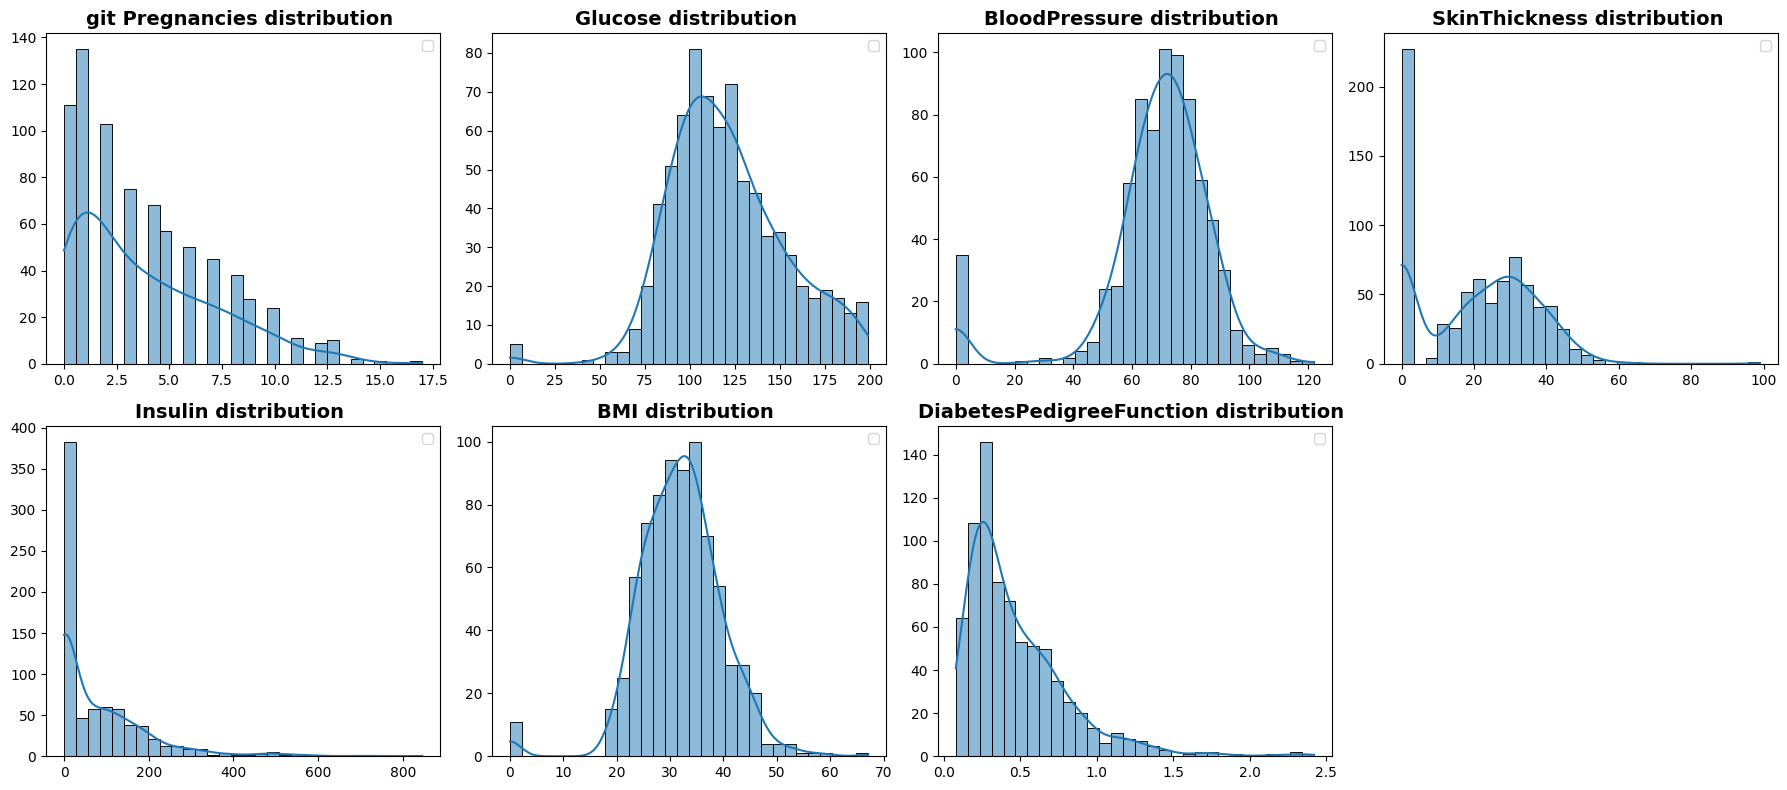

In [10]:
fig, axes = plt.subplots(2,4, figsize=(18, 8))
axes = axes.flatten()
# Plot histograms for each continuous column
# Plot histograms for each continuous column
for i, col_name in enumerate(cont_cols):
    ax = axes[i]
    sns.histplot(data=data, x=col_name, color = '#1f77b4',
                  kde=True, ax=ax,  bins=30)

    # Set title  
    ax.set_title(f'{col_name} distribution ', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily':'sans-serif'})
    ax.legend()
    ax.grid(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)

# Adjust layout
fig.delaxes(axes.flatten()[-1])
plt.tight_layout()
plt.show()

As shown in the the graph, Glucose , Blood Pressure , BMI generally follows normal distribution.  Later in the project, Outliers Analysis will be performed. Now, let's check whether we can convert the rest of the features to normal distribution using log(). Possibly, the rest follows lognormal. The reason we want to transform everything to normal distribution is that robust statistical models generally assume normality. However, if we cannot transform, more sophisticated statistical methods might be needed. 

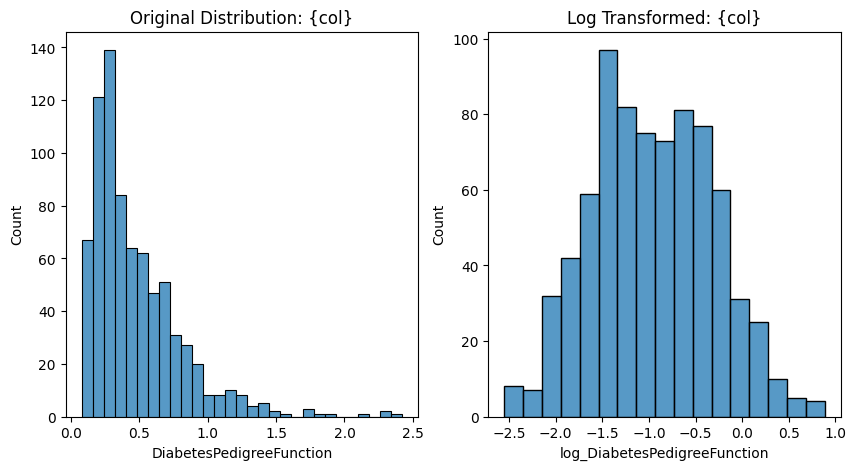

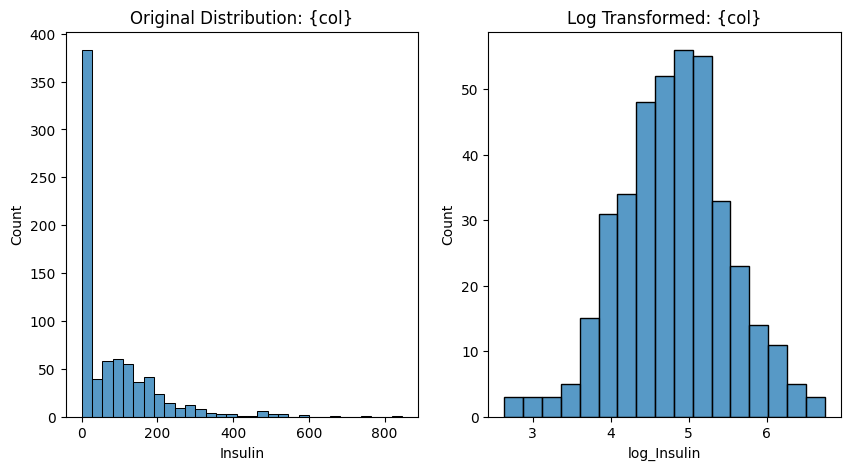

In [11]:
# Create subplots correctly
for col in ['DiabetesPedigreeFunction','Insulin']:
  fig, axes = plt.subplots(1, 2, figsize=(10,5))

    # Ensure column name is correctly referenced (adjust if needed)
  logname = f'log_{col}'
  data[logname] = np.log(data[col])

# Boxplots using the correct axes references
  sns.histplot(x=data[col], ax=axes[0])
  sns.histplot(x=data[logname], ax=axes[1])

  # Set titles for clarity
  axes[0].set_title('Original Distribution: {col}')
  axes[1].set_title('Log Transformed: {col}')

 

The logtransform seems to work!

In [12]:
data['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

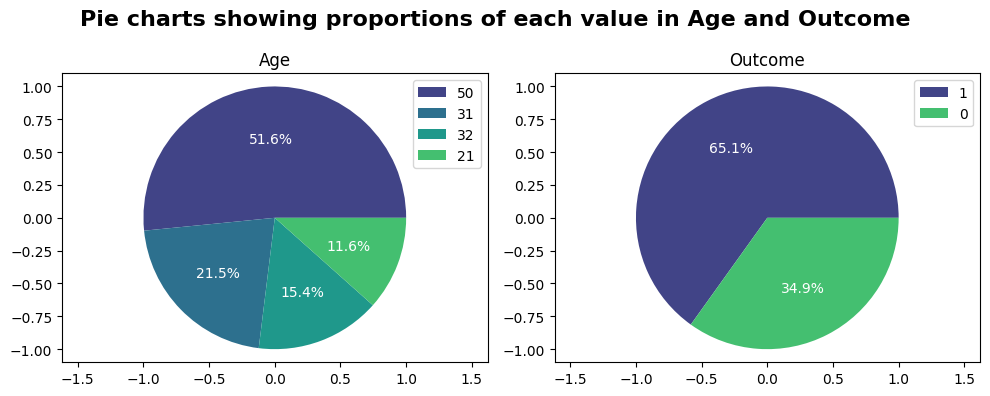

In [13]:
# Create a figure with 1 row and 2 columns of subplots, setting the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Flatten the axes array to make it easier to index (useful for multiple subplots)
axes = axes.flatten()

# Loop over selected columns ('Age' and 'Outcome') and create pie charts
for i, col_name in enumerate(['Age', 'Outcome']):
    ax = axes[i]  # Select the corresponding subplot
    
    # Generate colors using a colormap based on the number of unique values in the column
    colors = plt.get_cmap()(np.linspace(0.2, 0.7, len(df[col_name].unique())))

    # Create a pie chart for the column's value distribution
    ax.pie(df[col_name].value_counts(),  # Count occurrences of each unique value
           autopct='%1.1f%%',  # Display percentage labels
           colors=colors,  # Apply the generated colors
           frame=True,  # Show a frame around the pie chart
           textprops={'color': "white"})  # Set text color to white for better visibility

    # Set the title for the subplot
    ax.set_title(f'{col_name}')
    
    # Disable the grid for cleaner visualization
    ax.grid(False)
    
    # Ensure the pie chart is drawn as a perfect circle
    ax.axis('equal')
    
    # Add a legend with the unique values in the column
    ax.legend(data[col_name].unique(), loc='best')

# Add a super title for the entire figure
fig.suptitle('Pie charts showing proportions of each value in Age and Outcome', 
             fontsize=16, 
             fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

## Handling Outliers


In [14]:

def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1 
  upper_boundary = q3 + 1.5*iqr 
  lower_boundary = q3 - 1.5*iqr
  new_df = df.loc[(df[col]>lower_boundary)&(df[col]<upper_boundary)]
  return new_df

In [15]:
for col in cont_cols:
  data = remove_outliers(data, col)

Bivariate Distributions.

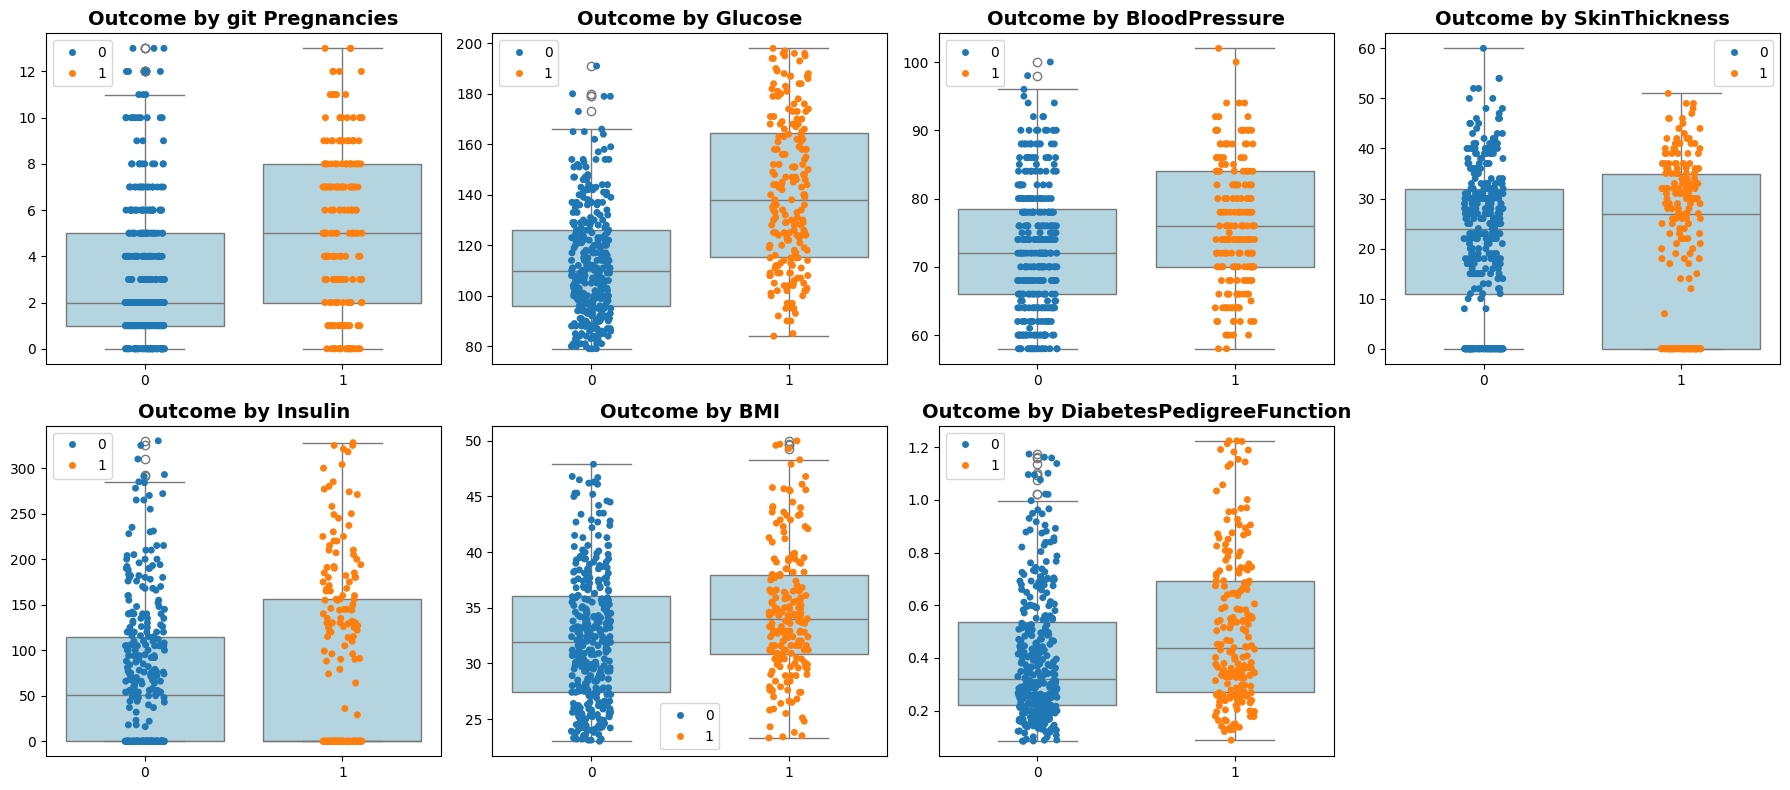

In [16]:
fig, axes = plt.subplots(2,4, figsize=(18, 8))
axes = axes.flatten()
# Plot histograms for each continuous column
# Plot histograms for each continuous column
for i, col_name in enumerate(cont_cols):
    ax = axes[i]
    sns.stripplot(data=data, hue='Outcome', y=col_name, x ='Outcome', ax=ax)
    sns.boxplot(data=data, y=col_name,color = 'lightblue', x ='Outcome', ax=ax)

    # Set title  
    ax.set_title(f'Outcome by {col_name}', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily':'sans-serif'})
    ax.legend()
    ax.grid(False)
    ax.set_ylabel(None)
    ax.set_xlabel(None)

# Adjust layout
fig.delaxes(axes.flatten()[-1])
plt.tight_layout()
plt.show()

- Git Pregnancies vs. Outcome
Higher median number of pregnancies for Outcome = 1 (diabetic individuals).
Suggests that more pregnancies may be associated with a higher likelihood of diabetes.

- Glucose vs. Outcome
Higher median glucose levels for Outcome = 1.
Clear separation in distributions, indicating glucose level is a strong predictor of diabetes.

- Blood Pressure vs. Outcome
Slightly higher median blood pressure for Outcome = 1.
The distributions overlap, suggesting weaker correlation with diabetes.

- Skin Thickness vs. Outcome
Higher median skin thickness for Outcome = 1.
Some overlap, but generally, higher values are associated with diabetes.

- Insulin vs. Outcome
Higher median insulin levels for Outcome = 1.
Wide variability and outliers, indicating individual differences.

- BMI vs. Outcome
Higher BMI in diabetic individuals (Outcome = 1).
BMI is a known risk factor for diabetes, so this correlation makes sense.

- Diabetes Pedigree Function vs. Outcome
Higher values for Outcome = 1.
Indicates a higher likelihood of diabetes in individuals with a family history.

Key Takeaways

✅ Glucose, BMI, and Insulin show the strongest correlation with diabetes (clear separation between the groups).

✅ Pregnancies and Diabetes Pedigree Function also seem relevant predictors.

⚠️ Blood Pressure and Skin Thickness have more overlap, indicating weaker predictive power.

📌 There are many outliers in Insulin, Glucose, and BMI, which may need further analysis.

Text(0.5, 1.0, 'Countplot by Age')

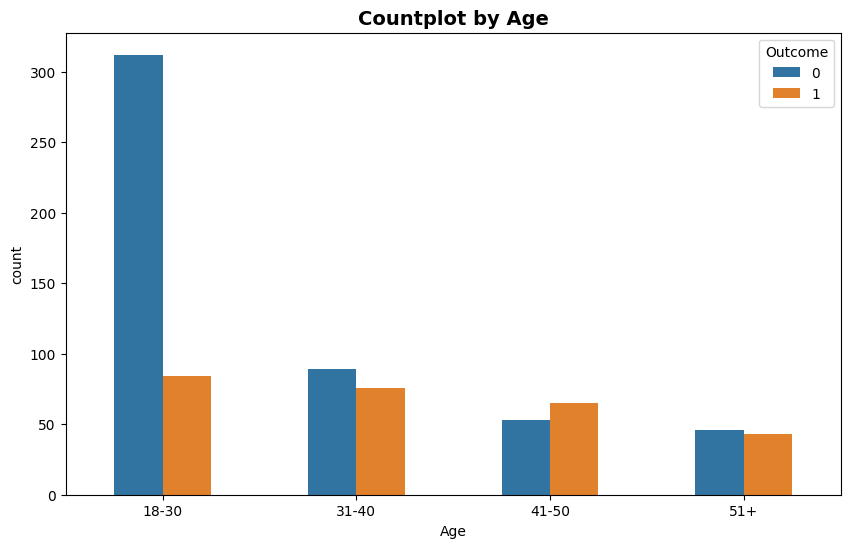

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,width=0.5, x = 'Age', hue = 'Outcome')
plt.title(f'Countplot by Age',fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily':'sans-serif'})

Key Takeaways:

✅ Younger individuals (18-30) have a lower incidence of diabetes, but they are the most represented age group.

✅ Diabetes prevalence increases with age, particularly in the 41-50 and 51+ groups.

✅ The 31-40 age group is evenly split between diabetic and non-diabetic individuals, making it a transition point.

✅ The sample size decreases with age, meaning older individuals are underrepresented in the dataset.

In [18]:
data['Outcome'].value_counts()

Outcome
0    340
1    195
Name: count, dtype: int64

The data is pretty imbalanced. 
Imbalanced data means that one class (e.g., fraud cases, rare diseases) significantly outnumbers another. This causes issues such as:
- Biased Predictions – The model favors the majority class, often ignoring the minority class.
- Poor Generalization – The model struggles to learn patterns for the minority class.
- Misleading Accuracy – High accuracy doesn’t mean good performance (e.g., 95% accuracy if 95% of cases belong to one class, but missing all minority cases).

*I will use SMOTE from imbalance libary to do this. For this dataset, I will use oversampling the minority class

In [19]:

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the target variable 'Outcome' into numeric labels (e.g., 0 and 1)
y = le.fit_transform(df['Outcome'])

#Encoding 'Age' 
df['Age'] = le.fit_transform(df['Age'])  
# Define feature variables (X) by dropping the target column 'Outcome'
X = df.drop(columns=['Outcome'])

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training dataset by oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:

# Define the objective function for Random Forest hyperparameter tuning
def objective_rf(trial):
    # Suggest number of trees and depth for optimization
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)

    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions and evaluate accuracy
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Define the objective function for SVM hyperparameter tuning
def objective_svm(trial):
    # Suggest values for regularization (C) and kernel coefficient (gamma)
    C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    gamma = trial.suggest_float('gamma', 1e-3, 1e3, log=True)

    # Initialize and train the SVM model
    model = SVC(C=C, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions and evaluate accuracy
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Define the objective function for Logistic Regression hyperparameter tuning
def objective_lr(trial):
    # Suggest a value for the regularization parameter (C)
    C = trial.suggest_float('C', 1e-3, 1e3, log=True)

    # Initialize and train the Logistic Regression model
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions and evaluate accuracy
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Define the objective function for XGBoost hyperparameter tuning
def objective_xgb(trial):
    # Suggest values for number of estimators, depth, and learning rate
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1.0, log=True)

    # Initialize and train the XGBoost model
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions and evaluate accuracy
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Create Optuna studies for hyperparameter tuning and optimize each model
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=50)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Retrieve the best hyperparameters and initialize models with optimal settings
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_svm = SVC(**study_svm.best_params, random_state=42)
best_lr = LogisticRegression(**study_lr.best_params, random_state=42)
best_xgb = XGBClassifier(**study_xgb.best_params, random_state=42)

# Store models in a dictionary
models = {
    'Random Forest': best_rf,
    'SVM': best_svm,
    'Logistic Regression': best_lr,
    'XGBoost': best_xgb
}

# Train the models on the training set and evaluate performance on the test set
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store performance metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
    }

# The `results` dictionary contains model evaluation metrics for comparison.


[I 2025-02-25 09:17:42,557] A new study created in memory with name: no-name-7ace32e7-7684-4ae5-8dfc-abee69232abb
[I 2025-02-25 09:17:42,615] Trial 0 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 29, 'max_depth': 3}. Best is trial 0 with value: 0.7662337662337663.
[I 2025-02-25 09:17:42,834] Trial 1 finished with value: 0.7619047619047619 and parameters: {'n_estimators': 121, 'max_depth': 6}. Best is trial 0 with value: 0.7662337662337663.
[I 2025-02-25 09:17:43,015] Trial 2 finished with value: 0.7619047619047619 and parameters: {'n_estimators': 93, 'max_depth': 8}. Best is trial 0 with value: 0.7662337662337663.
[I 2025-02-25 09:17:43,082] Trial 3 finished with value: 0.7402597402597403 and parameters: {'n_estimators': 30, 'max_depth': 26}. Best is trial 0 with value: 0.7662337662337663.
[I 2025-02-25 09:17:43,320] Trial 4 finished with value: 0.7489177489177489 and parameters: {'n_estimators': 155, 'max_depth': 2}. Best is trial 0 with value: 0.76623376623

In [21]:
# Print results
for name, metrics in results.items():
    print(f"\n{name} Performance Metrics:")
    for metric, value in metrics.items():
 
            print(f"{metric}: {value:.4f}")


Random Forest Performance Metrics:
Accuracy: 0.7662
Precision: 0.7616
Recall: 0.7662
F1 Score: 0.7542

SVM Performance Metrics:
Accuracy: 0.7403
Precision: 0.7423
Recall: 0.7403
F1 Score: 0.7122

Logistic Regression Performance Metrics:
Accuracy: 0.7619
Precision: 0.7564
Recall: 0.7619
F1 Score: 0.7573

XGBoost Performance Metrics:
Accuracy: 0.7662
Precision: 0.7677
Recall: 0.7662
F1 Score: 0.7669


In [22]:
results = pd.DataFrame(results)
results

,Random Forest,SVM,Logistic Regression,XGBoost
Accuracy,0.766234,0.740260,0.761905,0.766234
Precision,0.761558,0.742300,0.756422,0.767679
Recall,0.766234,0.740260,0.761905,0.766234
F1 Score,0.754212,0.712159,0.757300,0.766898


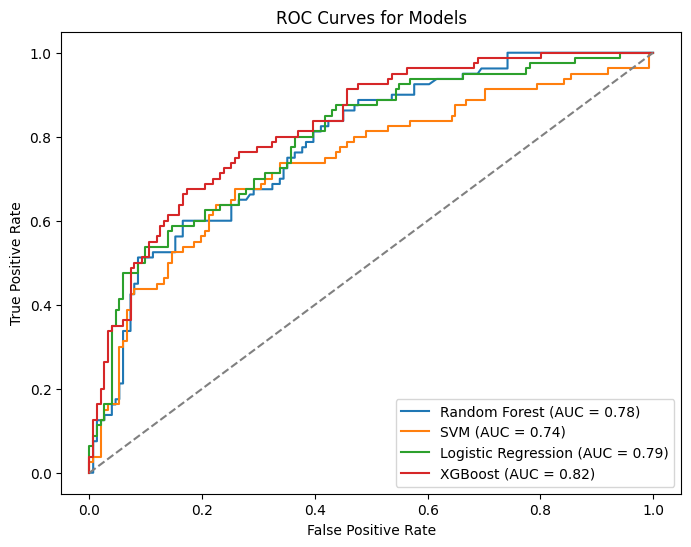

In [23]:

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Predict probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    else:
        y_score = model.decision_function(X_test)  # For SVM if no predict_proba

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# Final plot settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()


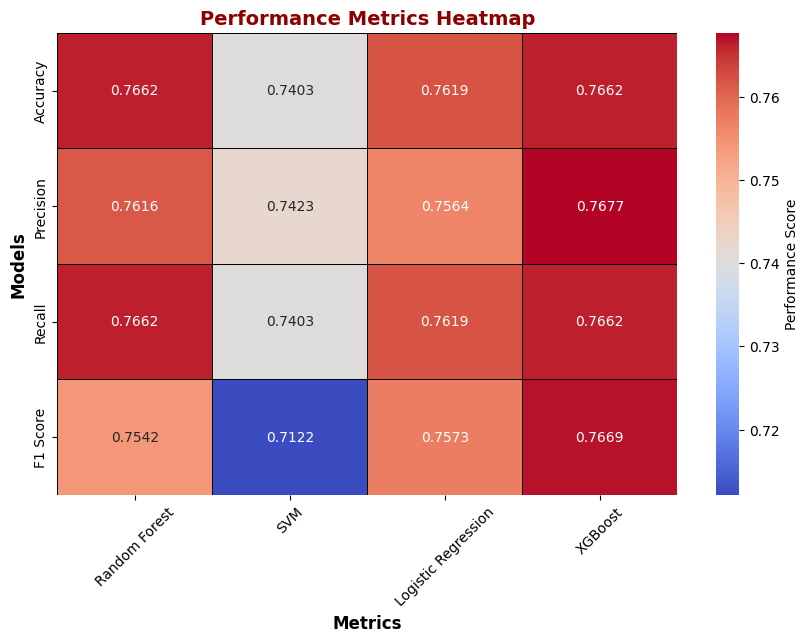

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    results, 
    annot=True, 
    cmap="coolwarm",  
    fmt=".4f", 
    linewidths=0.5,
    linecolor="black",  
    cbar_kws={'label': 'Performance Score'}   
)

plt.title("Performance Metrics Heatmap", fontsize=14, fontweight='bold', color="darkred")
plt.xlabel("Metrics", fontsize=12, fontweight='bold')
plt.ylabel("Models", fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As you can see, XGboost model has the best performance amongst the four models. 

In [25]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (if any)
df.fillna(df.median(), inplace=True)

# Select only numerical features for clustering
numeric_cols = df.select_dtypes(include=['number']).columns
X = df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


git Pregnancies             0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


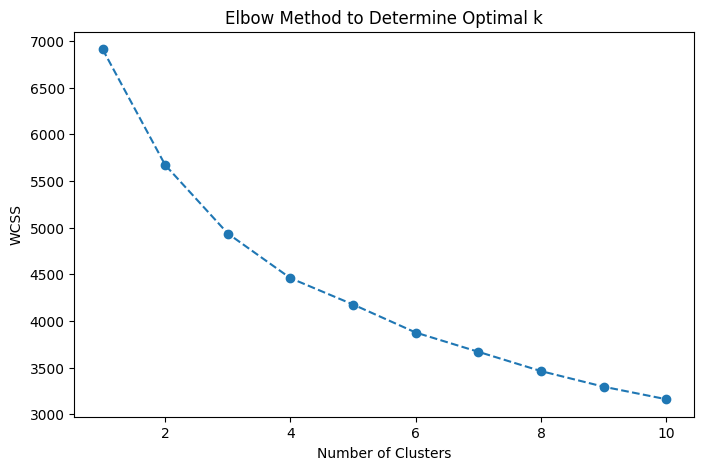

In [26]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):  # Checking clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = sum of squared distances from cluster centers

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [27]:
# Set the number of clusters (choose based on the elbow method)
optimal_k = 3  

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)  # Get cluster labels
df['K-means Cluster'] = clusters  # Add cluster labels to the original dataset


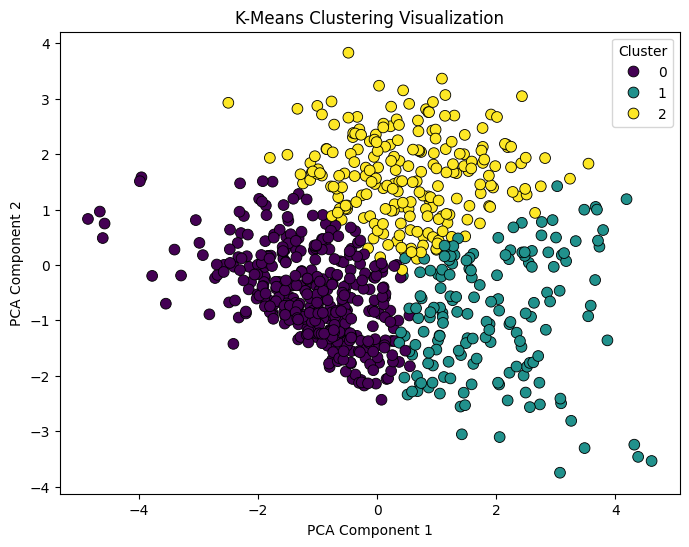

In [28]:
# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['K-means Cluster'], palette='viridis', s=60, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization')
plt.legend(title='Cluster')
plt.show()

The clusters appear reasonably well-separated, indicating that K-Means has found meaningful groupings.
However, there is some overlap between the teal and yellow clusters

The clusters are generally well-defined with minimal overlap.

Let's check other methods of clustering. 

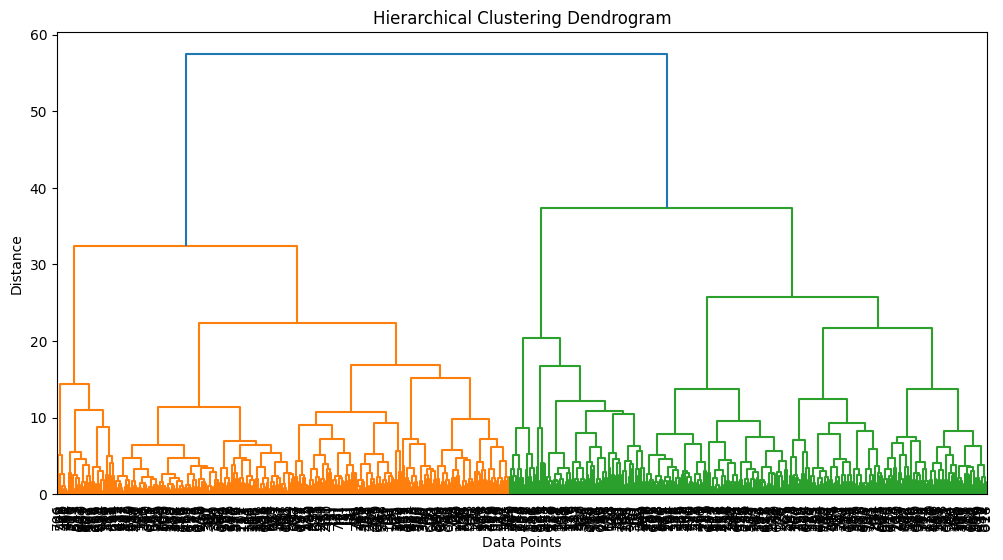

In [29]:
 
# Select only numerical features for clustering
numeric_cols = df.select_dtypes(include=['number']).columns
X = df[numeric_cols]

# Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hierarchical Clustering - Generate Dendrogram
plt.figure(figsize=(12, 6))
Z = linkage(X_scaled, method='ward')  # Ward's method minimizes variance
dendrogram(Z, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()




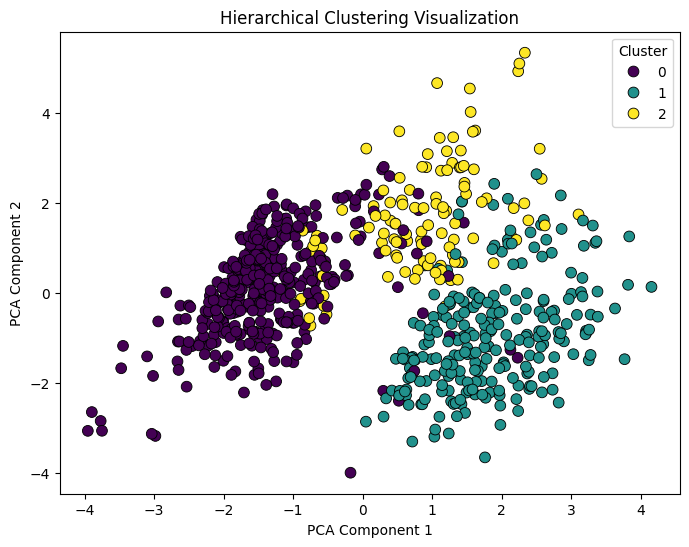

In [30]:
# Apply Agglomerative Clustering with Optimal k (choose based on dendrogram)
optimal_k = 3  # Adjust based on dendrogram observation
hierarchical_clusters = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical_clusters.fit_predict(X_scaled)

# Reduce Data to 2D using PCA for visualization
X_pca = PCA(n_components=2).fit_transform(X_scaled)

 

# Scatter plot of hierarchical clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Hierarchical_Cluster'], palette='viridis', s=60, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering Visualization')
plt.legend(title='Cluster')
plt.show()


It appears the hierarichial clustering has a lower performance than the k-means clustering

In [31]:
df.groupby('K-means Cluster').mean()


,git Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Hierarchical_Cluster
K-means Cluster,,,,,,,,,,
0,2.174026,104.516883,62.841558,19.524675,56.251948,29.544156,0.410701,0.225974,0.070130,0.088312
1,3.265432,149.543210,75.802469,34.783951,211.932099,37.599383,0.672333,0.913580,0.753086,1.432099
2,7.180995,128.425339,75.108597,11.855204,23.963801,32.147964,0.431507,1.959276,0.538462,0.968326


The table shows the mean values of different features grouped by clusters, which helps analyze how different clusters vary based on key characteristics.

Key Insights:

- Cluster 0 appears to be the healthiest group, with low glucose, BMI, and insulin.

- Cluster 1 has the highest diabetes risk, with very high glucose, BMI, and insulin.

- Cluster 2 is an intermediate-risk group, with moderate glucose and BMI but surprisingly low insulin.
